# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [28]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [29]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

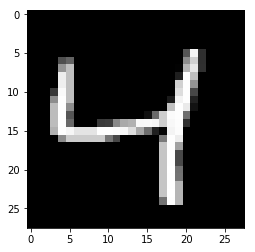

In [30]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [45]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=[None, 784])
targets_ = tf.placeholder(tf.float32, shape=[None, 784])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [32]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [46]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.9077
Epoch: 1/20... Training loss: 0.9065
Epoch: 1/20... Training loss: 0.9065
Epoch: 1/20... Training loss: 0.9052
Epoch: 1/20... Training loss: 0.9035
Epoch: 1/20... Training loss: 0.9001
Epoch: 1/20... Training loss: 0.8978
Epoch: 1/20... Training loss: 0.8948
Epoch: 1/20... Training loss: 0.8886
Epoch: 1/20... Training loss: 0.8830
Epoch: 1/20... Training loss: 0.8824
Epoch: 1/20... Training loss: 0.8775
Epoch: 1/20... Training loss: 0.8690
Epoch: 1/20... Training loss: 0.8668
Epoch: 1/20... Training loss: 0.8588
Epoch: 1/20... Training loss: 0.8500
Epoch: 1/20... Training loss: 0.8369
Epoch: 1/20... Training loss: 0.8320
Epoch: 1/20... Training loss: 0.8223
Epoch: 1/20... Training loss: 0.8139
Epoch: 1/20... Training loss: 0.8030
Epoch: 1/20... Training loss: 0.7991
Epoch: 1/20... Training loss: 0.7863
Epoch: 1/20... Training loss: 0.7765
Epoch: 1/20... Training loss: 0.7698
Epoch: 1/20... Training loss: 0.7592
Epoch: 1/20... Training loss: 0.7524
E

Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6935
Epoch: 1/20... Training loss: 0.6935
Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6935
Epoch: 1/20... Training loss: 0.6935
Epoch: 1/20... Training loss: 0.6936
Epoch: 1/20... Training loss: 0.6932
Epoch: 1/20... Training loss: 0.6935
Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6932
Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6935
Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6935
Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6932
Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6934
E

Epoch: 2/20... Training loss: 0.6928
Epoch: 2/20... Training loss: 0.6928
Epoch: 2/20... Training loss: 0.6928
Epoch: 2/20... Training loss: 0.6927
Epoch: 2/20... Training loss: 0.6929
Epoch: 2/20... Training loss: 0.6927
Epoch: 2/20... Training loss: 0.6930
Epoch: 2/20... Training loss: 0.6931
Epoch: 2/20... Training loss: 0.6928
Epoch: 2/20... Training loss: 0.6929
Epoch: 2/20... Training loss: 0.6928
Epoch: 2/20... Training loss: 0.6930
Epoch: 2/20... Training loss: 0.6930
Epoch: 2/20... Training loss: 0.6929
Epoch: 2/20... Training loss: 0.6930
Epoch: 2/20... Training loss: 0.6929
Epoch: 2/20... Training loss: 0.6928
Epoch: 2/20... Training loss: 0.6928
Epoch: 2/20... Training loss: 0.6928
Epoch: 2/20... Training loss: 0.6928
Epoch: 2/20... Training loss: 0.6929
Epoch: 2/20... Training loss: 0.6929
Epoch: 2/20... Training loss: 0.6930
Epoch: 2/20... Training loss: 0.6930
Epoch: 2/20... Training loss: 0.6927
Epoch: 2/20... Training loss: 0.6929
Epoch: 2/20... Training loss: 0.6927
E

Epoch: 3/20... Training loss: 0.6925
Epoch: 3/20... Training loss: 0.6925
Epoch: 3/20... Training loss: 0.6923
Epoch: 3/20... Training loss: 0.6924
Epoch: 3/20... Training loss: 0.6924
Epoch: 3/20... Training loss: 0.6926
Epoch: 3/20... Training loss: 0.6923
Epoch: 3/20... Training loss: 0.6925
Epoch: 3/20... Training loss: 0.6924
Epoch: 3/20... Training loss: 0.6923
Epoch: 3/20... Training loss: 0.6924
Epoch: 3/20... Training loss: 0.6924
Epoch: 3/20... Training loss: 0.6922
Epoch: 3/20... Training loss: 0.6922
Epoch: 3/20... Training loss: 0.6925
Epoch: 3/20... Training loss: 0.6924
Epoch: 3/20... Training loss: 0.6923
Epoch: 3/20... Training loss: 0.6924
Epoch: 3/20... Training loss: 0.6923
Epoch: 3/20... Training loss: 0.6925
Epoch: 3/20... Training loss: 0.6926
Epoch: 3/20... Training loss: 0.6923
Epoch: 3/20... Training loss: 0.6923
Epoch: 3/20... Training loss: 0.6924
Epoch: 3/20... Training loss: 0.6925
Epoch: 3/20... Training loss: 0.6921
Epoch: 3/20... Training loss: 0.6924
E

Epoch: 3/20... Training loss: 0.6917
Epoch: 4/20... Training loss: 0.6919
Epoch: 4/20... Training loss: 0.6922
Epoch: 4/20... Training loss: 0.6919
Epoch: 4/20... Training loss: 0.6921
Epoch: 4/20... Training loss: 0.6921
Epoch: 4/20... Training loss: 0.6920
Epoch: 4/20... Training loss: 0.6921
Epoch: 4/20... Training loss: 0.6923
Epoch: 4/20... Training loss: 0.6920
Epoch: 4/20... Training loss: 0.6921
Epoch: 4/20... Training loss: 0.6919
Epoch: 4/20... Training loss: 0.6920
Epoch: 4/20... Training loss: 0.6919
Epoch: 4/20... Training loss: 0.6921
Epoch: 4/20... Training loss: 0.6921
Epoch: 4/20... Training loss: 0.6922
Epoch: 4/20... Training loss: 0.6919
Epoch: 4/20... Training loss: 0.6919
Epoch: 4/20... Training loss: 0.6921
Epoch: 4/20... Training loss: 0.6918
Epoch: 4/20... Training loss: 0.6919
Epoch: 4/20... Training loss: 0.6920
Epoch: 4/20... Training loss: 0.6920
Epoch: 4/20... Training loss: 0.6922
Epoch: 4/20... Training loss: 0.6920
Epoch: 4/20... Training loss: 0.6919
E

Epoch: 4/20... Training loss: 0.6917
Epoch: 4/20... Training loss: 0.6917
Epoch: 4/20... Training loss: 0.6918
Epoch: 4/20... Training loss: 0.6919
Epoch: 4/20... Training loss: 0.6919
Epoch: 4/20... Training loss: 0.6918
Epoch: 4/20... Training loss: 0.6920
Epoch: 4/20... Training loss: 0.6919
Epoch: 4/20... Training loss: 0.6919
Epoch: 4/20... Training loss: 0.6919
Epoch: 4/20... Training loss: 0.6918
Epoch: 4/20... Training loss: 0.6917
Epoch: 4/20... Training loss: 0.6918
Epoch: 4/20... Training loss: 0.6918
Epoch: 4/20... Training loss: 0.6918
Epoch: 4/20... Training loss: 0.6919
Epoch: 4/20... Training loss: 0.6919
Epoch: 4/20... Training loss: 0.6919
Epoch: 4/20... Training loss: 0.6916
Epoch: 4/20... Training loss: 0.6919
Epoch: 4/20... Training loss: 0.6918
Epoch: 4/20... Training loss: 0.6914
Epoch: 4/20... Training loss: 0.6917
Epoch: 4/20... Training loss: 0.6916
Epoch: 4/20... Training loss: 0.6918
Epoch: 4/20... Training loss: 0.6917
Epoch: 4/20... Training loss: 0.6919
E

Epoch: 5/20... Training loss: 0.6915
Epoch: 5/20... Training loss: 0.6916
Epoch: 5/20... Training loss: 0.6915
Epoch: 5/20... Training loss: 0.6916
Epoch: 5/20... Training loss: 0.6916
Epoch: 5/20... Training loss: 0.6913
Epoch: 5/20... Training loss: 0.6917
Epoch: 5/20... Training loss: 0.6917
Epoch: 5/20... Training loss: 0.6917
Epoch: 5/20... Training loss: 0.6915
Epoch: 5/20... Training loss: 0.6918
Epoch: 5/20... Training loss: 0.6916
Epoch: 5/20... Training loss: 0.6913
Epoch: 5/20... Training loss: 0.6915
Epoch: 5/20... Training loss: 0.6916
Epoch: 5/20... Training loss: 0.6917
Epoch: 5/20... Training loss: 0.6916
Epoch: 5/20... Training loss: 0.6914
Epoch: 5/20... Training loss: 0.6913
Epoch: 5/20... Training loss: 0.6916
Epoch: 5/20... Training loss: 0.6914
Epoch: 5/20... Training loss: 0.6914
Epoch: 5/20... Training loss: 0.6914
Epoch: 5/20... Training loss: 0.6916
Epoch: 5/20... Training loss: 0.6916
Epoch: 5/20... Training loss: 0.6915
Epoch: 5/20... Training loss: 0.6915
E

Epoch: 6/20... Training loss: 0.6913
Epoch: 6/20... Training loss: 0.6915
Epoch: 6/20... Training loss: 0.6913
Epoch: 6/20... Training loss: 0.6912
Epoch: 6/20... Training loss: 0.6914
Epoch: 6/20... Training loss: 0.6914
Epoch: 6/20... Training loss: 0.6914
Epoch: 6/20... Training loss: 0.6913
Epoch: 6/20... Training loss: 0.6914
Epoch: 6/20... Training loss: 0.6915
Epoch: 6/20... Training loss: 0.6913
Epoch: 6/20... Training loss: 0.6912
Epoch: 6/20... Training loss: 0.6915
Epoch: 6/20... Training loss: 0.6912
Epoch: 6/20... Training loss: 0.6915
Epoch: 6/20... Training loss: 0.6913
Epoch: 6/20... Training loss: 0.6914
Epoch: 6/20... Training loss: 0.6915
Epoch: 6/20... Training loss: 0.6916
Epoch: 6/20... Training loss: 0.6913
Epoch: 6/20... Training loss: 0.6914
Epoch: 6/20... Training loss: 0.6916
Epoch: 6/20... Training loss: 0.6914
Epoch: 6/20... Training loss: 0.6914
Epoch: 6/20... Training loss: 0.6914
Epoch: 6/20... Training loss: 0.6914
Epoch: 6/20... Training loss: 0.6912
E

Epoch: 7/20... Training loss: 0.6914
Epoch: 7/20... Training loss: 0.6914
Epoch: 7/20... Training loss: 0.6914
Epoch: 7/20... Training loss: 0.6911
Epoch: 7/20... Training loss: 0.6912
Epoch: 7/20... Training loss: 0.6913
Epoch: 7/20... Training loss: 0.6914
Epoch: 7/20... Training loss: 0.6914
Epoch: 7/20... Training loss: 0.6912
Epoch: 7/20... Training loss: 0.6914
Epoch: 7/20... Training loss: 0.6915
Epoch: 7/20... Training loss: 0.6912
Epoch: 7/20... Training loss: 0.6913
Epoch: 7/20... Training loss: 0.6910
Epoch: 7/20... Training loss: 0.6912
Epoch: 7/20... Training loss: 0.6914
Epoch: 7/20... Training loss: 0.6913
Epoch: 7/20... Training loss: 0.6913
Epoch: 7/20... Training loss: 0.6915
Epoch: 7/20... Training loss: 0.6913
Epoch: 7/20... Training loss: 0.6913
Epoch: 7/20... Training loss: 0.6913
Epoch: 7/20... Training loss: 0.6912
Epoch: 7/20... Training loss: 0.6913
Epoch: 7/20... Training loss: 0.6913
Epoch: 7/20... Training loss: 0.6913
Epoch: 7/20... Training loss: 0.6915
E

Epoch: 7/20... Training loss: 0.6912
Epoch: 7/20... Training loss: 0.6915
Epoch: 7/20... Training loss: 0.6913
Epoch: 7/20... Training loss: 0.6912
Epoch: 7/20... Training loss: 0.6910
Epoch: 7/20... Training loss: 0.6912
Epoch: 7/20... Training loss: 0.6912
Epoch: 7/20... Training loss: 0.6913
Epoch: 7/20... Training loss: 0.6913
Epoch: 7/20... Training loss: 0.6913
Epoch: 7/20... Training loss: 0.6911
Epoch: 7/20... Training loss: 0.6914
Epoch: 7/20... Training loss: 0.6912
Epoch: 7/20... Training loss: 0.6912
Epoch: 7/20... Training loss: 0.6914
Epoch: 7/20... Training loss: 0.6911
Epoch: 7/20... Training loss: 0.6913
Epoch: 7/20... Training loss: 0.6912
Epoch: 7/20... Training loss: 0.6914
Epoch: 7/20... Training loss: 0.6913
Epoch: 7/20... Training loss: 0.6911
Epoch: 7/20... Training loss: 0.6913
Epoch: 7/20... Training loss: 0.6916
Epoch: 7/20... Training loss: 0.6914
Epoch: 7/20... Training loss: 0.6914
Epoch: 7/20... Training loss: 0.6911
Epoch: 7/20... Training loss: 0.6913
E

Epoch: 8/20... Training loss: 0.6911
Epoch: 8/20... Training loss: 0.6913
Epoch: 8/20... Training loss: 0.6913
Epoch: 8/20... Training loss: 0.6914
Epoch: 8/20... Training loss: 0.6914
Epoch: 8/20... Training loss: 0.6914
Epoch: 8/20... Training loss: 0.6912
Epoch: 8/20... Training loss: 0.6911
Epoch: 8/20... Training loss: 0.6912
Epoch: 8/20... Training loss: 0.6912
Epoch: 8/20... Training loss: 0.6912
Epoch: 8/20... Training loss: 0.6911
Epoch: 8/20... Training loss: 0.6913
Epoch: 8/20... Training loss: 0.6912
Epoch: 8/20... Training loss: 0.6914
Epoch: 8/20... Training loss: 0.6913
Epoch: 8/20... Training loss: 0.6911
Epoch: 8/20... Training loss: 0.6913
Epoch: 8/20... Training loss: 0.6910
Epoch: 8/20... Training loss: 0.6910
Epoch: 8/20... Training loss: 0.6914
Epoch: 8/20... Training loss: 0.6910
Epoch: 8/20... Training loss: 0.6912
Epoch: 8/20... Training loss: 0.6911
Epoch: 8/20... Training loss: 0.6912
Epoch: 8/20... Training loss: 0.6912
Epoch: 8/20... Training loss: 0.6913
E

Epoch: 9/20... Training loss: 0.6911
Epoch: 9/20... Training loss: 0.6913
Epoch: 9/20... Training loss: 0.6914
Epoch: 9/20... Training loss: 0.6911
Epoch: 9/20... Training loss: 0.6913
Epoch: 9/20... Training loss: 0.6912
Epoch: 9/20... Training loss: 0.6911
Epoch: 9/20... Training loss: 0.6913
Epoch: 9/20... Training loss: 0.6910
Epoch: 9/20... Training loss: 0.6910
Epoch: 9/20... Training loss: 0.6910
Epoch: 9/20... Training loss: 0.6912
Epoch: 9/20... Training loss: 0.6911
Epoch: 9/20... Training loss: 0.6910
Epoch: 9/20... Training loss: 0.6908
Epoch: 9/20... Training loss: 0.6912
Epoch: 9/20... Training loss: 0.6912
Epoch: 9/20... Training loss: 0.6912
Epoch: 9/20... Training loss: 0.6913
Epoch: 9/20... Training loss: 0.6911
Epoch: 9/20... Training loss: 0.6911
Epoch: 9/20... Training loss: 0.6912
Epoch: 9/20... Training loss: 0.6913
Epoch: 9/20... Training loss: 0.6911
Epoch: 9/20... Training loss: 0.6911
Epoch: 9/20... Training loss: 0.6910
Epoch: 9/20... Training loss: 0.6911
E

Epoch: 10/20... Training loss: 0.6910
Epoch: 10/20... Training loss: 0.6912
Epoch: 10/20... Training loss: 0.6912
Epoch: 10/20... Training loss: 0.6911
Epoch: 10/20... Training loss: 0.6911
Epoch: 10/20... Training loss: 0.6910
Epoch: 10/20... Training loss: 0.6908
Epoch: 10/20... Training loss: 0.6910
Epoch: 10/20... Training loss: 0.6912
Epoch: 10/20... Training loss: 0.6911
Epoch: 10/20... Training loss: 0.6911
Epoch: 10/20... Training loss: 0.6913
Epoch: 10/20... Training loss: 0.6910
Epoch: 10/20... Training loss: 0.6911
Epoch: 10/20... Training loss: 0.6912
Epoch: 10/20... Training loss: 0.6912
Epoch: 10/20... Training loss: 0.6909
Epoch: 10/20... Training loss: 0.6912
Epoch: 10/20... Training loss: 0.6913
Epoch: 10/20... Training loss: 0.6910
Epoch: 10/20... Training loss: 0.6910
Epoch: 10/20... Training loss: 0.6912
Epoch: 10/20... Training loss: 0.6911
Epoch: 10/20... Training loss: 0.6912
Epoch: 10/20... Training loss: 0.6910
Epoch: 10/20... Training loss: 0.6911
Epoch: 10/20

Epoch: 10/20... Training loss: 0.6908
Epoch: 10/20... Training loss: 0.6911
Epoch: 10/20... Training loss: 0.6910
Epoch: 10/20... Training loss: 0.6910
Epoch: 10/20... Training loss: 0.6911
Epoch: 10/20... Training loss: 0.6913
Epoch: 10/20... Training loss: 0.6911
Epoch: 10/20... Training loss: 0.6907
Epoch: 10/20... Training loss: 0.6909
Epoch: 11/20... Training loss: 0.6911
Epoch: 11/20... Training loss: 0.6911
Epoch: 11/20... Training loss: 0.6911
Epoch: 11/20... Training loss: 0.6909
Epoch: 11/20... Training loss: 0.6910
Epoch: 11/20... Training loss: 0.6913
Epoch: 11/20... Training loss: 0.6911
Epoch: 11/20... Training loss: 0.6912
Epoch: 11/20... Training loss: 0.6910
Epoch: 11/20... Training loss: 0.6910
Epoch: 11/20... Training loss: 0.6910
Epoch: 11/20... Training loss: 0.6908
Epoch: 11/20... Training loss: 0.6910
Epoch: 11/20... Training loss: 0.6912
Epoch: 11/20... Training loss: 0.6909
Epoch: 11/20... Training loss: 0.6910
Epoch: 11/20... Training loss: 0.6911
Epoch: 11/20

Epoch: 11/20... Training loss: 0.6912
Epoch: 11/20... Training loss: 0.6911
Epoch: 11/20... Training loss: 0.6912
Epoch: 11/20... Training loss: 0.6911
Epoch: 11/20... Training loss: 0.6910
Epoch: 11/20... Training loss: 0.6913
Epoch: 11/20... Training loss: 0.6909
Epoch: 11/20... Training loss: 0.6910
Epoch: 11/20... Training loss: 0.6910
Epoch: 11/20... Training loss: 0.6911
Epoch: 11/20... Training loss: 0.6911
Epoch: 11/20... Training loss: 0.6911
Epoch: 11/20... Training loss: 0.6909
Epoch: 11/20... Training loss: 0.6911
Epoch: 11/20... Training loss: 0.6909
Epoch: 11/20... Training loss: 0.6912
Epoch: 11/20... Training loss: 0.6912
Epoch: 11/20... Training loss: 0.6910
Epoch: 11/20... Training loss: 0.6911
Epoch: 11/20... Training loss: 0.6908
Epoch: 11/20... Training loss: 0.6908
Epoch: 11/20... Training loss: 0.6910
Epoch: 11/20... Training loss: 0.6909
Epoch: 11/20... Training loss: 0.6910
Epoch: 11/20... Training loss: 0.6911
Epoch: 11/20... Training loss: 0.6910
Epoch: 11/20

Epoch: 12/20... Training loss: 0.6911
Epoch: 12/20... Training loss: 0.6910
Epoch: 12/20... Training loss: 0.6911
Epoch: 12/20... Training loss: 0.6909
Epoch: 12/20... Training loss: 0.6910
Epoch: 12/20... Training loss: 0.6908
Epoch: 12/20... Training loss: 0.6910
Epoch: 12/20... Training loss: 0.6912
Epoch: 12/20... Training loss: 0.6911
Epoch: 12/20... Training loss: 0.6911
Epoch: 12/20... Training loss: 0.6909
Epoch: 12/20... Training loss: 0.6912
Epoch: 12/20... Training loss: 0.6912
Epoch: 12/20... Training loss: 0.6912
Epoch: 12/20... Training loss: 0.6910
Epoch: 12/20... Training loss: 0.6910
Epoch: 12/20... Training loss: 0.6910
Epoch: 12/20... Training loss: 0.6908
Epoch: 12/20... Training loss: 0.6908
Epoch: 12/20... Training loss: 0.6911
Epoch: 12/20... Training loss: 0.6909
Epoch: 12/20... Training loss: 0.6910
Epoch: 12/20... Training loss: 0.6908
Epoch: 12/20... Training loss: 0.6911
Epoch: 12/20... Training loss: 0.6911
Epoch: 12/20... Training loss: 0.6911
Epoch: 12/20

Epoch: 13/20... Training loss: 0.6909
Epoch: 13/20... Training loss: 0.6911
Epoch: 13/20... Training loss: 0.6910
Epoch: 13/20... Training loss: 0.6910
Epoch: 13/20... Training loss: 0.6909
Epoch: 13/20... Training loss: 0.6910
Epoch: 13/20... Training loss: 0.6909
Epoch: 13/20... Training loss: 0.6909
Epoch: 13/20... Training loss: 0.6909
Epoch: 13/20... Training loss: 0.6909
Epoch: 13/20... Training loss: 0.6910
Epoch: 13/20... Training loss: 0.6909
Epoch: 13/20... Training loss: 0.6908
Epoch: 13/20... Training loss: 0.6908
Epoch: 13/20... Training loss: 0.6908
Epoch: 13/20... Training loss: 0.6910
Epoch: 13/20... Training loss: 0.6908
Epoch: 13/20... Training loss: 0.6909
Epoch: 13/20... Training loss: 0.6908
Epoch: 13/20... Training loss: 0.6908
Epoch: 13/20... Training loss: 0.6910
Epoch: 13/20... Training loss: 0.6910
Epoch: 13/20... Training loss: 0.6910
Epoch: 13/20... Training loss: 0.6911
Epoch: 13/20... Training loss: 0.6906
Epoch: 13/20... Training loss: 0.6910
Epoch: 13/20

Epoch: 13/20... Training loss: 0.6908
Epoch: 13/20... Training loss: 0.6909
Epoch: 14/20... Training loss: 0.6908
Epoch: 14/20... Training loss: 0.6911
Epoch: 14/20... Training loss: 0.6910
Epoch: 14/20... Training loss: 0.6911
Epoch: 14/20... Training loss: 0.6907
Epoch: 14/20... Training loss: 0.6909
Epoch: 14/20... Training loss: 0.6909
Epoch: 14/20... Training loss: 0.6909
Epoch: 14/20... Training loss: 0.6908
Epoch: 14/20... Training loss: 0.6911
Epoch: 14/20... Training loss: 0.6912
Epoch: 14/20... Training loss: 0.6910
Epoch: 14/20... Training loss: 0.6908
Epoch: 14/20... Training loss: 0.6909
Epoch: 14/20... Training loss: 0.6909
Epoch: 14/20... Training loss: 0.6907
Epoch: 14/20... Training loss: 0.6908
Epoch: 14/20... Training loss: 0.6908
Epoch: 14/20... Training loss: 0.6911
Epoch: 14/20... Training loss: 0.6909
Epoch: 14/20... Training loss: 0.6908
Epoch: 14/20... Training loss: 0.6912
Epoch: 14/20... Training loss: 0.6909
Epoch: 14/20... Training loss: 0.6907
Epoch: 14/20

Epoch: 14/20... Training loss: 0.6909
Epoch: 14/20... Training loss: 0.6910
Epoch: 14/20... Training loss: 0.6909
Epoch: 14/20... Training loss: 0.6912
Epoch: 14/20... Training loss: 0.6909
Epoch: 14/20... Training loss: 0.6908
Epoch: 14/20... Training loss: 0.6911
Epoch: 14/20... Training loss: 0.6909
Epoch: 14/20... Training loss: 0.6909
Epoch: 14/20... Training loss: 0.6910
Epoch: 14/20... Training loss: 0.6907
Epoch: 14/20... Training loss: 0.6910
Epoch: 14/20... Training loss: 0.6909
Epoch: 14/20... Training loss: 0.6909
Epoch: 14/20... Training loss: 0.6911
Epoch: 14/20... Training loss: 0.6908
Epoch: 14/20... Training loss: 0.6910
Epoch: 14/20... Training loss: 0.6910
Epoch: 14/20... Training loss: 0.6907
Epoch: 14/20... Training loss: 0.6909
Epoch: 14/20... Training loss: 0.6908
Epoch: 14/20... Training loss: 0.6907
Epoch: 14/20... Training loss: 0.6909
Epoch: 14/20... Training loss: 0.6908
Epoch: 14/20... Training loss: 0.6911
Epoch: 14/20... Training loss: 0.6910
Epoch: 14/20

Epoch: 15/20... Training loss: 0.6907
Epoch: 15/20... Training loss: 0.6910
Epoch: 15/20... Training loss: 0.6908
Epoch: 15/20... Training loss: 0.6909
Epoch: 15/20... Training loss: 0.6910
Epoch: 15/20... Training loss: 0.6911
Epoch: 15/20... Training loss: 0.6908
Epoch: 15/20... Training loss: 0.6908
Epoch: 15/20... Training loss: 0.6908
Epoch: 15/20... Training loss: 0.6911
Epoch: 15/20... Training loss: 0.6906
Epoch: 15/20... Training loss: 0.6907
Epoch: 15/20... Training loss: 0.6909
Epoch: 15/20... Training loss: 0.6912
Epoch: 15/20... Training loss: 0.6908
Epoch: 15/20... Training loss: 0.6907
Epoch: 15/20... Training loss: 0.6908
Epoch: 15/20... Training loss: 0.6911
Epoch: 15/20... Training loss: 0.6908
Epoch: 15/20... Training loss: 0.6908
Epoch: 15/20... Training loss: 0.6908
Epoch: 15/20... Training loss: 0.6908
Epoch: 15/20... Training loss: 0.6910
Epoch: 15/20... Training loss: 0.6908
Epoch: 15/20... Training loss: 0.6907
Epoch: 15/20... Training loss: 0.6907
Epoch: 15/20

Epoch: 16/20... Training loss: 0.6909
Epoch: 16/20... Training loss: 0.6909
Epoch: 16/20... Training loss: 0.6906
Epoch: 16/20... Training loss: 0.6910
Epoch: 16/20... Training loss: 0.6908
Epoch: 16/20... Training loss: 0.6907
Epoch: 16/20... Training loss: 0.6908
Epoch: 16/20... Training loss: 0.6908
Epoch: 16/20... Training loss: 0.6909
Epoch: 16/20... Training loss: 0.6908
Epoch: 16/20... Training loss: 0.6909
Epoch: 16/20... Training loss: 0.6908
Epoch: 16/20... Training loss: 0.6908
Epoch: 16/20... Training loss: 0.6908
Epoch: 16/20... Training loss: 0.6907
Epoch: 16/20... Training loss: 0.6907
Epoch: 16/20... Training loss: 0.6909
Epoch: 16/20... Training loss: 0.6909
Epoch: 16/20... Training loss: 0.6908
Epoch: 16/20... Training loss: 0.6910
Epoch: 16/20... Training loss: 0.6910
Epoch: 16/20... Training loss: 0.6909
Epoch: 16/20... Training loss: 0.6907
Epoch: 16/20... Training loss: 0.6907
Epoch: 16/20... Training loss: 0.6910
Epoch: 16/20... Training loss: 0.6908
Epoch: 16/20

Epoch: 17/20... Training loss: 0.6908
Epoch: 17/20... Training loss: 0.6909
Epoch: 17/20... Training loss: 0.6909
Epoch: 17/20... Training loss: 0.6906
Epoch: 17/20... Training loss: 0.6910
Epoch: 17/20... Training loss: 0.6909
Epoch: 17/20... Training loss: 0.6908
Epoch: 17/20... Training loss: 0.6911
Epoch: 17/20... Training loss: 0.6908
Epoch: 17/20... Training loss: 0.6908
Epoch: 17/20... Training loss: 0.6907
Epoch: 17/20... Training loss: 0.6911
Epoch: 17/20... Training loss: 0.6907
Epoch: 17/20... Training loss: 0.6907
Epoch: 17/20... Training loss: 0.6909
Epoch: 17/20... Training loss: 0.6909
Epoch: 17/20... Training loss: 0.6907
Epoch: 17/20... Training loss: 0.6905
Epoch: 17/20... Training loss: 0.6909
Epoch: 17/20... Training loss: 0.6909
Epoch: 17/20... Training loss: 0.6908
Epoch: 17/20... Training loss: 0.6905
Epoch: 17/20... Training loss: 0.6908
Epoch: 17/20... Training loss: 0.6910
Epoch: 17/20... Training loss: 0.6907
Epoch: 17/20... Training loss: 0.6909
Epoch: 17/20

Epoch: 17/20... Training loss: 0.6909
Epoch: 17/20... Training loss: 0.6909
Epoch: 17/20... Training loss: 0.6910
Epoch: 17/20... Training loss: 0.6908
Epoch: 17/20... Training loss: 0.6907
Epoch: 17/20... Training loss: 0.6907
Epoch: 17/20... Training loss: 0.6907
Epoch: 17/20... Training loss: 0.6907
Epoch: 17/20... Training loss: 0.6907
Epoch: 17/20... Training loss: 0.6908
Epoch: 17/20... Training loss: 0.6907
Epoch: 17/20... Training loss: 0.6909
Epoch: 17/20... Training loss: 0.6907
Epoch: 17/20... Training loss: 0.6906
Epoch: 17/20... Training loss: 0.6911
Epoch: 17/20... Training loss: 0.6906
Epoch: 17/20... Training loss: 0.6908
Epoch: 17/20... Training loss: 0.6909
Epoch: 17/20... Training loss: 0.6906
Epoch: 17/20... Training loss: 0.6906
Epoch: 17/20... Training loss: 0.6908
Epoch: 17/20... Training loss: 0.6905
Epoch: 17/20... Training loss: 0.6909
Epoch: 17/20... Training loss: 0.6906
Epoch: 17/20... Training loss: 0.6908
Epoch: 17/20... Training loss: 0.6909
Epoch: 17/20

Epoch: 18/20... Training loss: 0.6907
Epoch: 18/20... Training loss: 0.6908
Epoch: 18/20... Training loss: 0.6907
Epoch: 18/20... Training loss: 0.6907
Epoch: 18/20... Training loss: 0.6906
Epoch: 18/20... Training loss: 0.6908
Epoch: 18/20... Training loss: 0.6908
Epoch: 18/20... Training loss: 0.6909
Epoch: 18/20... Training loss: 0.6906
Epoch: 18/20... Training loss: 0.6908
Epoch: 18/20... Training loss: 0.6911
Epoch: 18/20... Training loss: 0.6907
Epoch: 18/20... Training loss: 0.6906
Epoch: 18/20... Training loss: 0.6908
Epoch: 18/20... Training loss: 0.6910
Epoch: 18/20... Training loss: 0.6910
Epoch: 18/20... Training loss: 0.6908
Epoch: 18/20... Training loss: 0.6909
Epoch: 18/20... Training loss: 0.6910
Epoch: 18/20... Training loss: 0.6911
Epoch: 18/20... Training loss: 0.6906
Epoch: 18/20... Training loss: 0.6911
Epoch: 18/20... Training loss: 0.6909
Epoch: 18/20... Training loss: 0.6909
Epoch: 18/20... Training loss: 0.6905
Epoch: 18/20... Training loss: 0.6909
Epoch: 18/20

Epoch: 19/20... Training loss: 0.6906
Epoch: 19/20... Training loss: 0.6910
Epoch: 19/20... Training loss: 0.6908
Epoch: 19/20... Training loss: 0.6906
Epoch: 19/20... Training loss: 0.6908
Epoch: 19/20... Training loss: 0.6908
Epoch: 19/20... Training loss: 0.6907
Epoch: 19/20... Training loss: 0.6906
Epoch: 19/20... Training loss: 0.6905
Epoch: 19/20... Training loss: 0.6905
Epoch: 19/20... Training loss: 0.6909
Epoch: 19/20... Training loss: 0.6907
Epoch: 19/20... Training loss: 0.6906
Epoch: 19/20... Training loss: 0.6908
Epoch: 19/20... Training loss: 0.6907
Epoch: 19/20... Training loss: 0.6904
Epoch: 19/20... Training loss: 0.6905
Epoch: 19/20... Training loss: 0.6905
Epoch: 19/20... Training loss: 0.6907
Epoch: 19/20... Training loss: 0.6906
Epoch: 19/20... Training loss: 0.6907
Epoch: 19/20... Training loss: 0.6906
Epoch: 19/20... Training loss: 0.6906
Epoch: 19/20... Training loss: 0.6907
Epoch: 19/20... Training loss: 0.6907
Epoch: 19/20... Training loss: 0.6907
Epoch: 19/20

Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6906
Epoch: 20/20... Training loss: 0.6908
Epoch: 20/20... Training loss: 0.6905
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6905
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6908
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6905
Epoch: 20/20... Training loss: 0.6906
Epoch: 20/20... Training loss: 0.6908
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6906
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6906
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6906
Epoch: 20/20... Training loss: 0.6904
Epoch: 20/20... Training loss: 0.6905
Epoch: 20/20... Training loss: 0.6906
Epoch: 20/20

Epoch: 20/20... Training loss: 0.6908
Epoch: 20/20... Training loss: 0.6906
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6906
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6906
Epoch: 20/20... Training loss: 0.6906
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6906
Epoch: 20/20... Training loss: 0.6906
Epoch: 20/20... Training loss: 0.6905
Epoch: 20/20... Training loss: 0.6909
Epoch: 20/20... Training loss: 0.6908
Epoch: 20/20... Training loss: 0.6908
Epoch: 20/20... Training loss: 0.6906
Epoch: 20/20... Training loss: 0.6908
Epoch: 20/20... Training loss: 0.6906
Epoch: 20/20... Training loss: 0.6908
Epoch: 20/20... Training loss: 0.6906
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6907
Epoch: 20/20... Training loss: 0.6904
Epoch: 20/20... Training loss: 0.6905
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

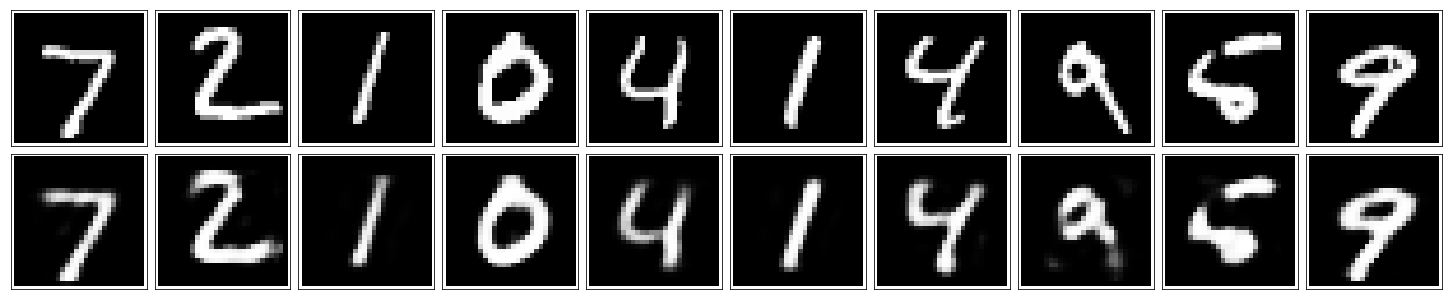

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [24]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.